<a href="https://colab.research.google.com/github/Aseem2004/Data_Science/blob/main/4_Machine_Learning/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

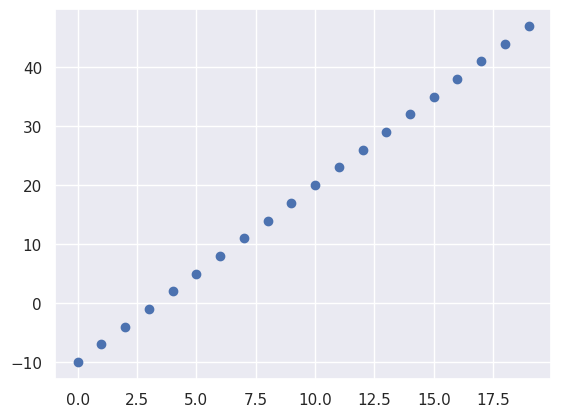

In [6]:
n=20
x=np.arange(20)
y=3*x-10
plt.scatter(x,y)

* Now, y=3*x-10 is our equation but let us generate this equation with the help of Linear Regression. Let the model itself fit the curve.




In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model=LinearRegression()

In [9]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
y

array([-10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17,  20,  23,  26,
        29,  32,  35,  38,  41,  44,  47])

* x[:, np.newaxis] reshapes the array to (n, 1), converting the 1D array into a 2D column vector. This is essential because LinearRegression requires the feature matrix X to have two dimensions: one for samples and one for features.

In [11]:
model.fit(x[:,np.newaxis],y)

LinearRegression()

In [12]:
y_pred=model.predict(x[:,np.newaxis])

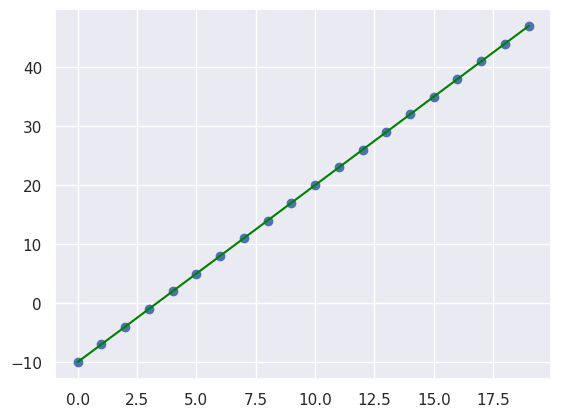

In [13]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='green')

* The equation is 3*x-10 and perfectly fit with the graph

In [14]:
model.coef_

array([3.])

In [15]:
model.intercept_

-10.000000000000004

* At x=20, y=3*20-10=50 and Linear Regression also confirms the same

In [16]:
model.predict([[20]])

array([50.])

#Multiple Linear Regression<br>
- With train_test_split

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
data={
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Income': [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000],
    'House_Price': [200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000]
}

df=pd.DataFrame(data)

In [19]:
df.head()

,Age,Income,House_Price
0,25,30000,200000
1,30,40000,250000
2,35,50000,300000
3,40,60000,350000
4,45,70000,400000


In [20]:
df.shape

(8, 3)

In [21]:
x=df[['Age','Income']]
y=df['House_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_test)

In [24]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [2.49999938e-03 4.99999875e+00]
Model Intercept: 49999.97500000615


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y_test,y_pred)

5.505714157152952e-21

In [27]:
new_data=np.array([[28, 45000], [50, 85000]])
new_predictions=model.predict(new_data)
print("Predicted House Prices:", new_predictions)

Predicted House Prices: [274999.98875 474999.99375]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Polynomial Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression

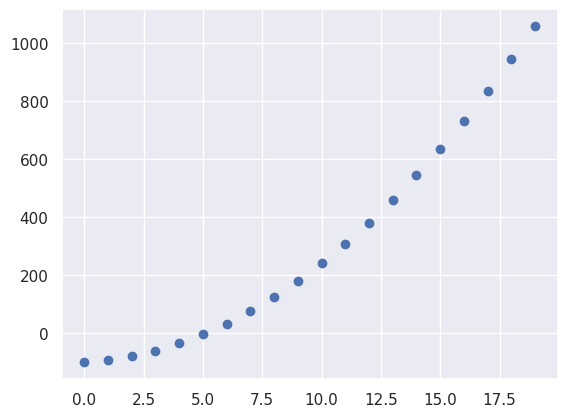

In [29]:
n=20
x=np.arange(n)
y=3*(x**2)+4*x-100
plt.scatter(x,y)

* Now, y=3*(x**2)+4*x-100 is our equation but let us generate this equation with the help of Linear and Polynomial Regression. Let the model itself fit the curve.




In [30]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [31]:
y

array([-100,  -93,  -80,  -61,  -36,   -5,   32,   75,  124,  179,  240,
        307,  380,  459,  544,  635,  732,  835,  944, 1059])

In [32]:
model=LinearRegression()

In [34]:
model.fit(x[:,np.newaxis],y)

LinearRegression()

In [35]:
y_pred=model.predict(x[:,np.newaxis])

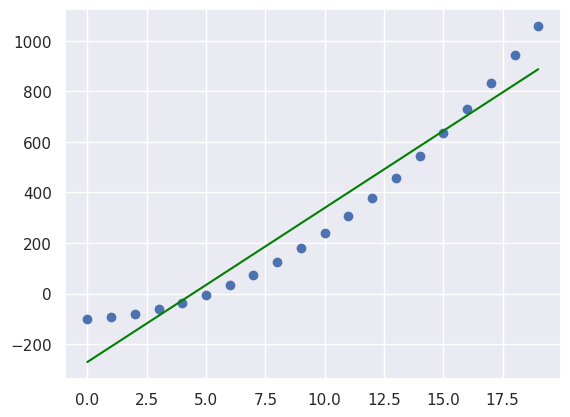

In [36]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='green')

* This is obviously wrong as a straight line is used to fit a polynoial curve. Hence, now we will use PolynomialFeatures

In [37]:
from sklearn.preprocessing import PolynomialFeatures

* PolynomialFeatures(degree=2): This creates a PolynomialFeatures object, which is responsible for transforming the original feature X into additional polynomial featuresdepending on the specified degree.<br>
degree=2: Specifies that we want to include terms up to
X<sup>2</sup> (quadratic terms) in the model. <br>

* X_poly=poly.fit_transform(X):  It transforms the original input X into a new feature set that includes polynomial terms.<br>
 * fit: Computes the transformation rules based on the input data.<br>
 * transform: Applies these rules to X to generate the transformed feature set.

In [44]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x[:,np.newaxis])

In [45]:
model.fit(x_poly,y)

LinearRegression()

In [46]:
y_pred=model.predict(x_poly)

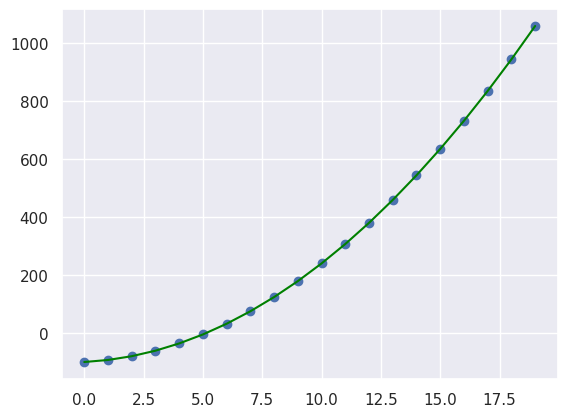

In [47]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='green')

In [48]:
model.coef_

array([0., 4., 3.])

In [49]:
model.intercept_

-100.00000000000006